**Практическая работа №4. Генетический алгоритм на задаче onemax**

Есть поколение особей (индивидов). У каждой особи есть хромосома с генами (битовая строка). Задача состоит в том, чтобы с помощью отбора, скрещивания и мутации (с заданными вероятностями) получить особи с максимальным количеством единиц в хромосоме.

Поколение 1: Макс приспособ. = 334, Средняя приспособ.= 308.07
Поколение 2: Макс приспособ. = 338, Средняя приспособ.= 315.91
Поколение 3: Макс приспособ. = 345, Средняя приспособ.= 323.59
Поколение 4: Макс приспособ. = 347, Средняя приспособ.= 329.73
Поколение 5: Макс приспособ. = 352, Средняя приспособ.= 335.86
Поколение 6: Макс приспособ. = 365, Средняя приспособ.= 342.02
Поколение 7: Макс приспособ. = 370, Средняя приспособ.= 347.98
Поколение 8: Макс приспособ. = 371, Средняя приспособ.= 352.73
Поколение 9: Макс приспособ. = 376, Средняя приспособ.= 357.72
Поколение 10: Макс приспособ. = 378, Средняя приспособ.= 362.25
Поколение 11: Макс приспособ. = 379, Средняя приспособ.= 367.08
Поколение 12: Макс приспособ. = 381, Средняя приспособ.= 372.21
Поколение 13: Макс приспособ. = 383, Средняя приспособ.= 375.92
Поколение 14: Макс приспособ. = 385, Средняя приспособ.= 378.04
Поколение 15: Макс приспособ. = 385, Средняя приспособ.= 379.66
Поколение 16: Макс приспособ. = 387, Средняя прис

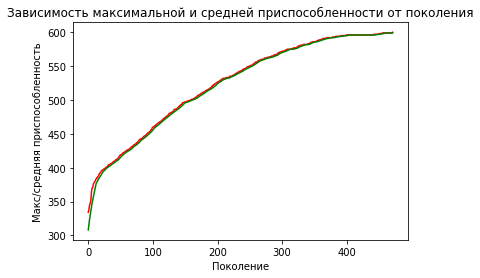

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt

ONE_MAX_LENGTH = 600    # длина подлежащей оптимизации битовой строки
POPULATION_SIZE = 100   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 10000    # максимальное количество поколений


class Individ:
    """Класс для представления данных об индивидууме"""
    def __init__(self, genes: np.ndarray):
        self.genes = genes
        self.fitness = self.get_fitness(genes)

    @staticmethod
    def get_fitness(one_individ):
        return sum(one_individ)

    def update_fitness(self):
        self.fitness = self.get_fitness(self.genes)


def create_individ(len_of_individ: int):
    """Метод создания индивидуума"""
    return Individ(np.random.randint(0, 2, len_of_individ))


def make_crossover(individ1, individ2, slice_i: int):
    """Метод одноточечного кроссовера по переданному индексу"""
    new_individ1 = Individ(np.concatenate([individ1.genes[0:slice_i], individ2.genes[slice_i:]]))
    new_individ2 = Individ(np.concatenate([individ2.genes[0:slice_i], individ1.genes[slice_i:]]))
    return new_individ1, new_individ2


def make_mutation(individ) -> None:
    """Метод мутации, который инвертирует случайный ген у индивидуума"""
    random_index = np.random.randint(0, len(individ.genes))
    individ.genes[random_index] = 0 if individ.genes[random_index] == 1 else 1


def make_selection(population: list) -> list:
    """Метод турнирного отбора.
    len(population) раз отбираем троих различных индвидуумов.
    Добавляем в список максимальное значение среди троих."""

    res = list()

    for _ in range(len(population)):
        res.append(max(random.sample(population, k=3), key=lambda x: x.fitness))

    return res


def get_pairs_indexes(len_population: int) -> zip:
    """Метод для получения пар индексов"""
    lst_indexes = list(range(len_population))
    return zip(lst_indexes[::2], lst_indexes[1::2])


population = [create_individ(ONE_MAX_LENGTH) for _ in range(POPULATION_SIZE)]
fitness = [individ.fitness for individ in population]

GENERATION_COUNTER = 0

lst_mean_fitness = list()
lst_max_fitness = list()

# Цикл, пока не найдем лучшее решение или не пройдем все поколения
while max(fitness) < ONE_MAX_LENGTH and GENERATION_COUNTER < MAX_GENERATIONS:
    GENERATION_COUNTER += 1
    population = make_selection(population)
    pairs_indexes = get_pairs_indexes(POPULATION_SIZE)

    for p_i in pairs_indexes:
        if random.random() < P_CROSSOVER:
            crossover = make_crossover(population[p_i[0]], population[p_i[1]], random.randint(0, ONE_MAX_LENGTH))
            population[p_i[0]] = crossover[0]
            population[p_i[1]] = crossover[1]

    for i in range(POPULATION_SIZE):
        if random.random() < P_MUTATION:
            make_mutation(population[i])

    for individ in population:
        individ.update_fitness()

    fitness = [individ.fitness for individ in population]

    MAX_FITNESS = max(fitness)
    MEAN_FITNESS = sum(fitness) / POPULATION_SIZE

    lst_max_fitness.append(MAX_FITNESS)
    lst_mean_fitness.append(MEAN_FITNESS)

    print(f"Поколение {GENERATION_COUNTER}: Макс приспособ. = {MAX_FITNESS}, Средняя приспособ.= {MEAN_FITNESS}")


plt.plot(lst_max_fitness, color='red')
plt.plot(lst_mean_fitness, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()
